In [30]:
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs

In [31]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

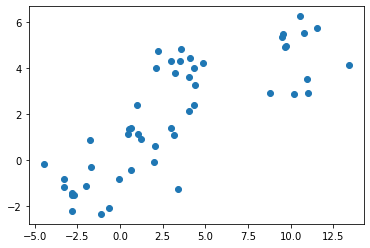

In [32]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [33]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [34]:
# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

In [35]:
# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

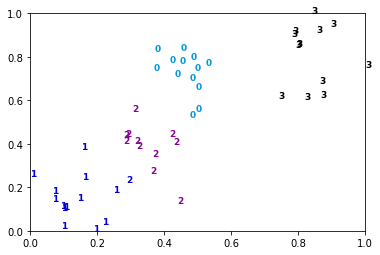

In [36]:
# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})



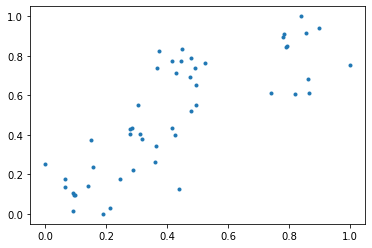

In [37]:
# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

In [38]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.26481198 0.17465083 ... 0.15048167 0.26314191 0.15966327]
 [0.26481198 0.         0.21732707 ... 0.39869711 0.0572807  0.312244  ]
 [0.17465083 0.21732707 0.         ... 0.2333229  0.25321425 0.10574549]
 ...
 [0.15048167 0.39869711 0.2333229  ... 0.         0.40697062 0.14314462]
 [0.26314191 0.0572807  0.25321425 ... 0.40697062 0.         0.33863342]
 [0.15966327 0.312244   0.10574549 ... 0.14314462 0.33863342 0.        ]]


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


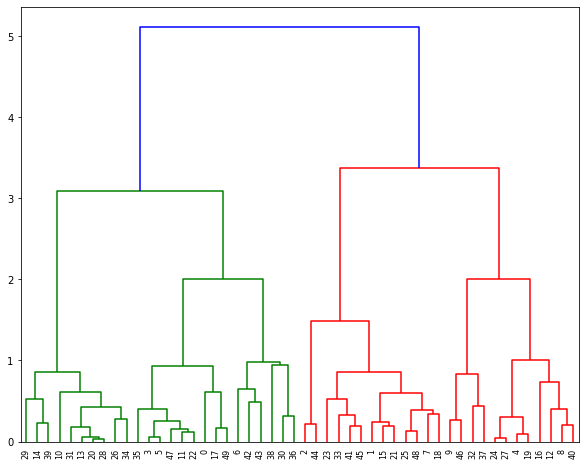

In [39]:
plt.figure(figsize=(10,8))
Z = hierarchy.linkage(dist_matrix, 'complete')  #or average
dendro = hierarchy.dendrogram(Z)